# House Price Prediction

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
#drop No column
df.drop('No', axis='columns', inplace=True)

KeyError: "['No'] not found in axis"

In [16]:
#change columns names
df.columns = ['Transaction Date', 
              'House Age',
              'Nearest MRT Station',
              'Convenience Stores',
              'Latitude',
              'Longitude',
              'Price of Unit Area']

df.head()

,Transaction Date,House Age,Nearest MRT Station,Convenience Stores,Latitude,Longitude,Price of Unit Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Visualizing the location of the houses based on latitude and longitude

<Figure size 432x288 with 0 Axes>

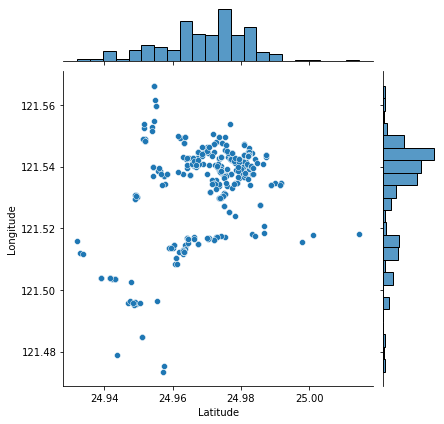

In [15]:
import seaborn as sns

plt.figure()
sns.jointplot(x=df['Latitude'],y=df['Longitude'])
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.show()

## Linear Regression (Price of Unit Area X House Age)

In [19]:
df['Intercept'] = 1

lm = sm.OLS(df['Price of Unit Area'], df[['Intercept', 'House Age']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Price of Unit Area   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.56e-05
Time:                        05:28:17   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4347      1.211     35.042      0.000      40.054      44.815
House Age     -0.2515      0.058     -4.372      0.000      -0.365      -0.138
==============================================================================
Omnibus:                       48.404   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.054
Skew:                           0.589   Prob(JB):                     1.40e-26
Kurtosis:                       5.348   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""